In [407]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# State House Special Election

In [3]:
pwd

'/Users/lilyfalk/sandbox/pdv-va/vest_va'

In [408]:
final = gpd.read_file('./va_2018_statehouse_special/va_2018_statehouse_special.shp')

In [409]:
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S18HODDEM,S18HODREP,S18HODWRI,geometry
0,009,Amherst County,000102,New Glasgow,024,117,168,2,"POLYGON Z ((-79.04809 37.53463 0.00000, -79.04..."
1,009,Amherst County,000103,Coolwell,024,21,84,1,"POLYGON Z ((-79.08422 37.51334 0.00000, -79.08..."
2,009,Amherst County,000201,Court House,024,270,408,14,"POLYGON Z ((-79.15210 37.57883 0.00000, -79.15..."
3,009,Amherst County,000202,Temperance,024,61,140,3,"POLYGON Z ((-79.30301 37.74092 0.00000, -79.30..."
4,009,Amherst County,000301,Monroe,024,68,163,5,"POLYGON Z ((-79.19354 37.57677 0.00000, -79.19..."
...,...,...,...,...,...,...,...,...,...
74,161,Roanoke County,000108,WILDWOOD,008,335,664,3,"POLYGON Z ((-80.08046 37.32419 0.00000, -80.08..."
75,161,Roanoke County,000106,GREEN HILL,008,643,1271,3,"POLYGON Z ((-80.08835 37.28149 0.00000, -80.08..."
76,161,Roanoke County,000103,GLENVAR,008,374,835,2,"POLYGON Z ((-80.21886 37.26382 0.00000, -80.21..."
77,121,Montgomery County,000304,Precinct C-4,008,599,810,3,"POLYGON Z ((-80.30263 37.16025 0.00000, -80.30..."


In [410]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

## Election results

### District 8

In [470]:
df8 = pd.read_csv('./Virginia_Elections_Database__2018_House_of_Delegates_General_Election_District_8_including_precincts.csv')

In [471]:
df8.head()

,County/City,Ward,Pct,Joseph P. McNamara,"Edward Carter Turner, III",All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Craig County,-,101 - Court House,300,80,1.0,381
2,Craig County,-,201 - Ammendale Precinct,402,90,0.0,492
3,Craig County,-,301 - Givens & Reynolds Store,188,92,0.0,280
4,Craig County,-,303 - Marshalls Store,160,77,0.0,237


In [472]:
df8['County/City'].nunique()

5

In [473]:
df8.shape

(46, 7)

In [474]:
df8 = df8.iloc[1:]

In [475]:
df8 = df8.drop(['Ward'], axis = 1)

In [476]:
df8['HOD_DIST'] = '8'

In [477]:
#dont actually need this since function rename didnt work
column_dict = {'County/City': 'LOCALITY', 'Joseph P. McNamara': 'S18HODREP', 'Edward Carter Turner, III': 'S18HODDEM',
              'All Others': 'S18HODWRI',
              'Ronnie Ray Campbell': 'S18HODREP', 'Christian Renau Worth': 'S18HODDEM'}

In [478]:
df8['LOCALITY'] = df8['County/City'].rename(column_dict.get('County/City'))
df8['S18HODREP'] = df8['Joseph P. McNamara']
df8['S18HODDEM'] = df8['Edward Carter Turner, III']
df8['S18HODWRI'] = df8['All Others']
df8 = df8.drop(['County/City', 'Joseph P. McNamara', 'Edward Carter Turner, III', 'All Others'], axis = 1)

In [479]:
df8.head()

,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI
1,101 - Court House,381,8,Craig County,300,80,1.0
2,201 - Ammendale Precinct,492,8,Craig County,402,90,0.0
3,301 - Givens & Reynolds Store,280,8,Craig County,188,92,0.0
4,303 - Marshalls Store,237,8,Craig County,160,77,0.0
5,401 - Barbours Creek,198,8,Craig County,149,49,0.0


In [480]:
df8.LOCALITY.nunique()

5

In [422]:
'''
Below code messing up the locality, so stop useing it

def rename_columns(results, column_dict):
    for col in results.columns:
        print(col)
        if col in column_dict.keys():
            col_new_name = column_dict.get(col)
            results = results.rename(columns = {col:col_new_name})
            print(col_new_name)
    return results.head()
'''

'\nBelow code messing up the locality, so stop useing it\n\ndef rename_columns(results, column_dict):\n    for col in results.columns:\n        print(col)\n        if col in column_dict.keys():\n            col_new_name = column_dict.get(col)\n            results = results.rename(columns = {col:col_new_name})\n            print(col_new_name)\n    return results.head()\n'

In [481]:
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()

In [482]:
county_dict

{'Amherst County': '009',
 'Augusta County': '015',
 'Bath County': '017',
 'Rockbridge County': '163',
 'Buena Vista City': '530',
 'Lexington City': '678',
 'Craig County': '045',
 'Montgomery County': '121',
 'Roanoke County': '161',
 'Salem City': '775'}

In [425]:
df8['LOCALITY'].value_counts()

Roanoke County       15
Salem City           12
Craig County          9
Montgomery County     8
TOTALS                1
Name: LOCALITY, dtype: int64

In [483]:
df8['COUNTYFP'] = df8['LOCALITY'].map(county_dict)

In [484]:
df8.COUNTYFP.nunique()

4

In [485]:
df8.LOCALITY.nunique()

5

In [486]:
column_list = ['S18HODREP', 'S18HODDEM', 'S18HODWRI']

In [487]:
df8['S18HODREP'] = df8['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df8['S18HODDEM'] = df8['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df8['S18HODWRI'] = df8['S18HODWRI'].map(lambda x: str(x).replace(',', ''))

In [488]:
df8['S18HODREP'] = df8['S18HODREP'].astype(str).astype(float).astype(int)
df8['S18HODDEM'] = df8['S18HODDEM'].astype(str).astype(float).astype(int)
df8['S18HODWRI'] = df8['S18HODWRI'].astype(str).astype(float).astype(int)

In [489]:
df8.groupby(['COUNTYFP']).sum()

,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
045,1666,519,1
121,3706,2955,16
161,10487,5912,23
775,5942,3906,10


### District 24

In [490]:
df24 = pd.read_csv('./Virginia_Elections_Database__2018_House_of_Delegates_Special_General_Election_District_24_including_precincts.csv')

In [491]:
df24.head()

,County/City,Ward,Pct,Ronnie Ray Campbell,Christian Renau Worth,All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Amherst County,-,102 - New Glasgow,164,114,2.0,280
2,Amherst County,-,103 - Coolwell,82,20,1.0,103
3,Amherst County,-,201 - Court House,397,261,13.0,671
4,Amherst County,-,202 - Temperance,137,59,3.0,199


In [492]:
df24['County/City'].nunique()

7

In [493]:
df24.shape

(55, 7)

In [494]:
df24 = df24.iloc[1:]

In [495]:
df24 = df24.drop(['Ward'], axis = 1)

In [496]:
df24['HOD_DIST'] = '24'

In [497]:
df24['County/City'].nunique()

7

In [498]:
df24['LOCALITY'] = df24['County/City']
df24['S18HODREP'] = df24['Ronnie Ray Campbell']
df24['S18HODDEM'] = df24['Christian Renau Worth']
df24['S18HODWRI'] = df24['All Others']
df24 = df24.drop(['County/City', 'Ronnie Ray Campbell', 'Christian Renau Worth', 'All Others'], axis = 1)

In [442]:
#df24 = rename_columns(df24, column_dict)

In [499]:
df24['COUNTYFP'] = df24['LOCALITY'].map(county_dict)

In [500]:
df24['LOCALITY'].nunique()

7

In [501]:
df24['COUNTYFP'].nunique()

6

In [502]:
df24['COUNTYFP'].value_counts()

163    19
009    11
017     9
015     8
530     3
678     3
Name: COUNTYFP, dtype: int64

In [447]:
df8.COUNTYFP.value_counts()

161    15
775    12
045     9
121     8
Name: COUNTYFP, dtype: int64

In [503]:
df24['S18HODREP'] = df24['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df24['S18HODDEM'] = df24['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df24['S18HODWRI'] = df24['S18HODWRI'].map(lambda x: str(x).replace(',', ''))
df24['S18HODREP'] = df24['S18HODREP'].astype(str).astype(float).astype(int)
df24['S18HODDEM'] = df24['S18HODDEM'].astype(str).astype(float).astype(int)
df24['S18HODWRI'] = df24['S18HODWRI'].astype(str).astype(float).astype(int)

In [505]:
df24.groupby(['COUNTYFP']).sum()

,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
009,1659,844,45
015,1369,465,1
017,360,227,0
163,2560,1861,17
530,385,236,0
678,287,853,4


In [506]:
df8.COUNTYFP.nunique() + df24.COUNTYFP.nunique()

10

In [507]:
df8.COUNTYFP.value_counts()

161    15
775    12
045     9
121     8
Name: COUNTYFP, dtype: int64

In [508]:
final.COUNTYFP.nunique()

10

In [509]:
final.HOD_DIST.value_counts()

024    42
008    37
Name: HOD_DIST, dtype: int64

### Districts 24 and 8 together

In [510]:
elections = []
elections.append(df24)
elections.append(df8)

In [516]:
df = pd.concat(elections, axis = 0)

In [517]:
df = df[df['LOCALITY'] != 'TOTALS']

In [534]:
df = df.reset_index()

## Reallocate absentee votes

In [535]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''A spec specifies in first line what function will do
    Returns fraction of county absentee votes for a precinct for a candidate
    
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    
    "Pure function" bc only relies on inputs and outputs - only variables are ones that were passed as arguments
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [536]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
absentee_and_prov

,level_0,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI,COUNTYFP
9,9,10,Ab - Central Absentee Precinct,66,24,Amherst County,40,25,1,009
10,10,11,Provisional,2,24,Amherst County,1,1,0,009
17,17,18,Ab - Central Absentee Precinct,24,24,Augusta County,18,6,0,015
18,18,19,Provisional,1,24,Augusta County,1,0,0,015
26,26,27,Ab - Central Absentee Precinct,20,24,Bath County,7,13,0,017
27,27,28,Provisional,0,24,Bath County,0,0,0,017
30,30,31,Provisional,0,24,Buena Vista City,0,0,0,530
32,32,33,Ab - Central Absentee Precinct,91,24,Lexington City,27,62,2,678
33,33,34,Provisional,0,24,Lexington City,0,0,0,678
51,51,52,Ab - Central Absentee Precinct,151,24,Rockbridge County,78,73,0,163


In [662]:
absentee_and_prov.COUNTYFP.nunique()

10

In [663]:
final.COUNTYFP.nunique()

10

In [537]:
absentee_and_prov[column_list].sum().sum()

2765

In [538]:
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()
groupby_absentee_and_prov_tot

,level_0,index,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,,,
009,19,21,41,26,1
015,35,37,19,6,0
017,53,55,7,13,0
045,61,9,0,0,0
121,137,33,170,217,0
161,167,63,722,564,1
163,103,105,78,75,0
530,30,31,0,0,0
678,65,67,27,62,2


In [664]:
groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')] #NOT SURE WHY I HAD THIS IN HERE BEFORE???: & (df['COUNTYFP'] != '009')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [665]:
df_no_absent_or_provisional[column_list].sum().sum()

43551

In [666]:
groupby_county_tot_no_absentee

,level_0,index,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,,,
009,36,45,1618,818,44
015,81,87,1350,459,1
017,154,161,353,214,0
045,452,36,1666,519,1
121,387,75,3536,2738,16
161,988,312,9765,5348,22
163,714,731,2482,1786,17
530,57,59,385,236,0
678,31,32,260,791,2


In [667]:
df.fillna(0)

,level_0,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI,COUNTYFP
0,0,1,102 - New Glasgow,280,24,Amherst County,164,114,2,009
1,1,2,103 - Coolwell,103,24,Amherst County,82,20,1,009
2,2,3,201 - Court House,671,24,Amherst County,397,261,13,009
3,3,4,202 - Temperance,199,24,Amherst County,137,59,3,009
4,4,5,301 - Monroe,230,24,Amherst County,159,66,5,009
...,...,...,...,...,...,...,...,...,...,...
92,92,40,8 - East Salem,334,8,Salem City,198,136,0,775
93,93,41,9 - South Side Hills,"1,247",8,Salem City,834,413,0,775
94,94,42,10 - Hidden Valley,"1,367",8,Salem City,830,536,1,775
95,95,43,Ab - Central Absentee Precinct,729,8,Salem City,424,304,1,775


In [668]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
for index, precinct_total_row_by_candidate in df_no_absent_or_provisional.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['COUNTYFP']
    county_total_row_by_candidate_no_absentee = groupby_county_tot_no_absentee.loc[county_fips]
    county_absentee_and_provisional_by_candidate = groupby_absentee_and_prov_tot.loc[county_fips]
    #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
    for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
        prec_tot = precinct_total_row_by_candidate[candidate]
        #print('precinct total: ', prec_tot)
        county_tot = votes
        #print('county total: ', county_tot)
        absentee_tot = county_absentee_and_provisional_by_candidate[candidate]
        #print('absentee total: ', absentee_tot)
        absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
        #print('absentee votes to allocate to precinct: ', absentee_frac)
        prec_with_absentee_allocation = prec_tot + absentee_frac
        #print('new precinct total: ', prec_with_absentee_allocation)
        df_with_absentee_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column

In [669]:
df_with_absentee_reallocated.shape

(79, 10)

In [670]:
df_with_absentee_reallocated.COUNTYFP.value_counts()

163    17
161    13
775    10
009     9
045     8
017     7
015     6
121     6
530     2
678     1
Name: COUNTYFP, dtype: int64

In [672]:
final.shape

(79, 10)

## Check columns sums

In [673]:
groupby_county_final = final.groupby('COUNTYFP').sum()
groupby_df_with_absentee_reallocated = df_with_absentee_reallocated.groupby('COUNTYFP').sum()
df_absentee_reallocate_with_final = pd.merge(groupby_df_with_absentee_reallocated, groupby_county_final, on = 'COUNTYFP', how = 'inner', suffixes = ('_x', '_y'))

In [676]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [677]:
sum_checker(df_absentee_reallocate_with_final, column_list)

column:  S18HODDEM
RDH sum is  17779.0
Partner sum is  17778
their (absolute) difference is  1.0
As a percentage of DF1 this is  0.00562%

column:  S18HODREP
RDH sum is  28418.0
Partner sum is  28421
their (absolute) difference is  3.0
As a percentage of DF1 this is  0.01056%

column:  S18HODWRI
RDH sum is  114.0
Partner sum is  117
their (absolute) difference is  3.0
As a percentage of DF1 this is  2.63158%

The max difference (as a percent of the total of on DF column is:  0.02632


In [680]:
(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)).nunique()

79

In [681]:
df_with_absentee_reallocated.shape

(79, 10)

In [682]:
(final.COUNTYFP + final.VTDST.str.slice(start = 3)).nunique()

79

### Create unique ID to enable merge

In [683]:
set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))

{'5301 -',
 '5302 -',
 '6781 -',
 '7751 -',
 '77510 ',
 '7752 -',
 '7753 -',
 '7754 -',
 '7755 -',
 '7756 -',
 '7757 -',
 '7758 -',
 '7759 -'}

In [684]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [685]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated.head()

In [688]:
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.vtdst
df_with_absentee_reallocated.head()

In [690]:
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)

In [691]:
set(df_with_absentee_reallocated.unique_id) - set(final.unique_id)

set()

In [692]:
set(final.unique_id) - set(df_with_absentee_reallocated.unique_id)

set()

# Shapefile

In [735]:
cd ../

/Users/lilyfalk/sandbox/pdv-va


In [731]:
path = ('./vest_va/census_shps_by_county_all_unzip/')
os.chdir(path)
county_fips = []
for directory in os.listdir():
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

In [732]:
proj = final.crs

In [736]:
path = ('./vest_va/census_shps_by_county_all_unzip/')
os.chdir(path)
county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = 'partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [737]:
global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

In [739]:
cd ../

/Users/lilyfalk/sandbox/pdv-va


In [740]:
path = ('./vest_va/census_shps_by_county_all_unzip/')
os.chdir(path)
county_sldl = []

for i in county_fips: #i dont have fips_codes file
    ref = 'partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    print(i, ' added to list')
    county_sldl.append(sldl_shp)

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

In [741]:
global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

In [ ]:
two_files_readin = gpd.read_file(vtd_sldl)

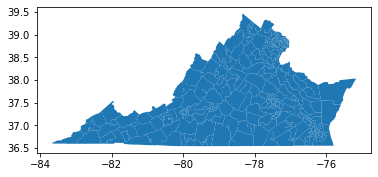

In [742]:
shp_sldl.plot()

In [745]:
overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)

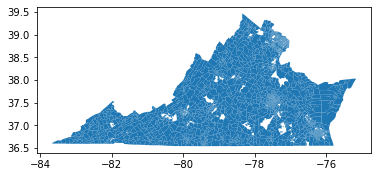

In [746]:
overlay.plot()

In [747]:
overlay.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [751]:
shp = overlay[(overlay.SLDLST == '008') | (overlay.SLDLST == '024')]

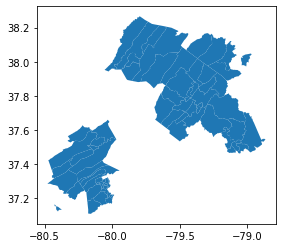

In [752]:
shp.plot()

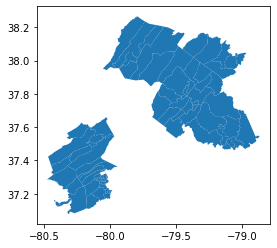

In [749]:
final.plot()

In [753]:
shp.shape

(74, 42)

In [754]:
final.shape

(79, 10)

In [755]:
shp.head()

,STATEFP_1,COUNTYFP_1,SLDLST,NAMELSAD_1,LSAD_1,PARTFLG,CHNG_TYPE_1,EFF_DATE,NEW_NAME,NEW_CODE,...,CHNG_TYPE_2,ORIG_NAME,ORIG_CODE,RELATE_2,NAME_2,VINTAGE_2,FUNCSTAT_2,JUSTIFY_2,MTFCC,geometry
44,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,A-1,90,N,None,G5240,"POLYGON Z ((-80.33488 37.22841 0.00000, -80.33..."
48,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,B-2,90,N,None,G5240,"POLYGON Z ((-80.40190 37.12351 0.00000, -80.40..."
50,51,121,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,C-3,90,N,None,G5240,"POLYGON Z ((-80.31228 37.20136 0.00000, -80.31..."
70,51,161,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,CATAWBA,90,N,None,G5240,"POLYGON Z ((-80.25185 37.30107 0.00000, -80.25..."
71,51,161,008,State House District 8,LL,Y,None,None,None,None,...,None,None,None,None,MASONS VALLEY,90,N,None,G5240,"POLYGON Z ((-80.21898 37.26371 0.00000, -80.21..."


In [757]:
shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'SLDLST', 'NAMELSAD_1', 'LSAD_1', 'PARTFLG',
       'CHNG_TYPE_1', 'EFF_DATE', 'NEW_NAME', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'LSY',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2', 'VTDST',
       'NAMELSAD_2', 'VTDI', 'LSAD_2', 'CHNG_TYPE_2', 'ORIG_NAME', 'ORIG_CODE',
       'RELATE_2', 'NAME_2', 'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC',
       'geometry'],
      dtype='object')

In [761]:
len(set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))

0

In [762]:
len(set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)))

5

In [764]:
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)

# Validation

## Validating Shapfile

In [768]:
shp_final_merge = pd.merge(shp, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [769]:
print(vals.value_counts())

True     57
False    17
dtype: int64


161    7
163    6
530    2
015    1
121    1
Name: unique_id, dtype: int64


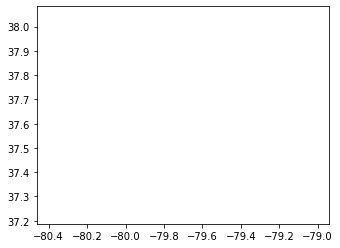

In [771]:
print(shp_final_merge[~vals]['unique_id'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = proj)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

   STATEFP_1 COUNTYFP_1 SLDLST               NAMELSAD_1 LSAD_1 PARTFLG  \
0         51        121    008   State House District 8     LL       Y   
4         51        161    008   State House District 8     LL       Y   
5         51        161    008   State House District 8     LL       Y   
6         51        161    008   State House District 8     LL       Y   
8         51        161    008   State House District 8     LL       Y   
11        51        161    008   State House District 8     LL       Y   
36        51        015    024  State House District 24     LL       Y   
39        51        163    024  State House District 24     LL       Y   
42        51        163    024  State House District 24     LL       Y   
43        51        161    008   State House District 8     LL       Y   
44        51        161    008   State House District 8     LL       Y   
59        51        163    024  State House District 24     LL       Y   
60        51        163    024  State 

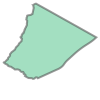

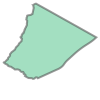

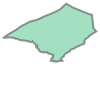

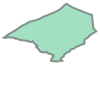

In [772]:
#Show a random difference
test = shp_final_merge[~vals].sample(axis = 0, n=1).index[0]
print(shp_final_merge[~vals])
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

test = shp_final_merge[~vals].sample(axis = 0).index[0]
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

### County 121 ex

(3, 52)


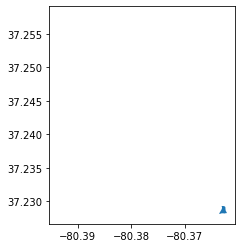

In [774]:
print(shp_final_merge[shp_final_merge['unique_id'].str[0:3] == '121'].shape)
ex_x = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_x', crs = proj)
ex_y = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_y', crs = proj)

gpd.overlay(ex_x, ex_y, how = 'symmetric_difference').plot()

## Validating election results

In [693]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id', how = 'inner', suffixes = ['_x', '_y'])

In [694]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'HOD_DIST', 'S18HODDEM',
       'S18HODREP', 'S18HODWRI', 'geometry', 'unique_id'],
      dtype='object')

In [695]:
column_list = ['S18HODDEM', 'S18HODREP', 'S18HODWRI']

In [696]:
#From Peter's MO
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [697]:
validater_row(final_df_merge, column_list)

New max diff is:  1.0
% difference from VEST total is:  0.8547008547008548
009102
There are  79  total rows
30  of these rows have election result differences
49  of these rows are the same

The max difference between any one shared column in a row is:  1.0
The average difference is:  1.0
There are  0 precinct results with a difference greater than 5


Great results! +/- 1 vote is easily accounted for by rounding error